# Palleja & Suez genus (rarefied to 190) at baseline vs V1-V2 distance of KEGG module random forest permutation + a full part of LOOCV

## 1. Read in data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
genus = pd.read_csv('/Users/Jessica/Documents/Lab/Multiple_longitudinal/Microbe_resilience/Palleja_Suez_genus_baseline_predict_KEGGmodule_vegdist_bray_forML.txt',
                   delimiter = "\t")

In [17]:
genus.head()

,Study,ID,Dist_V1V2,Shannon,Timepoint,Run,Acetobacter,Acidiphilium,Acinetobacter,Adlercreutzia,...,Roseburia,Ruminococcaceae.gen..incertae.sedis,Ruminococcus,Ruthenibacterium,Senegalimassilia,Streptococcus,Subdoligranulum,Succinivibrio,Sutterella,Veillonella
0,Suez,603,0.062441,2.913679,Baseline,ERR2749744,0,0,0,0,...,3,8,9,0,0,2,0,0,0,0
1,Suez,604,0.186243,2.251118,Baseline,ERR2749783,0,0,0,0,...,5,1,2,0,0,0,0,15,1,2
2,Suez,605,0.194813,2.516153,Baseline,ERR2749816,0,0,0,0,...,2,2,5,0,0,0,0,19,2,0
3,Suez,606,0.297473,2.626778,Baseline,ERR2749856,0,0,0,0,...,16,1,4,0,0,2,0,0,0,0
4,Suez,704,0.274741,2.183833,Baseline,ERR2750073,0,0,0,0,...,20,0,2,0,0,0,0,0,0,0


## 2. Set up evaluation environment. Use stratified 5-fold CV

In [18]:
my_data = genus.drop(columns=['Timepoint', 'Study', "Run"])

In [19]:
my_data.head()

,ID,Dist_V1V2,Shannon,Acetobacter,Acidiphilium,Acinetobacter,Adlercreutzia,Akkermansia,Alistipes,Anaeromassilibacillus,...,Roseburia,Ruminococcaceae.gen..incertae.sedis,Ruminococcus,Ruthenibacterium,Senegalimassilia,Streptococcus,Subdoligranulum,Succinivibrio,Sutterella,Veillonella
0,603,0.062441,2.913679,0,0,0,0,5,0,0,...,3,8,9,0,0,2,0,0,0,0
1,604,0.186243,2.251118,0,0,0,0,0,1,0,...,5,1,2,0,0,0,0,15,1,2
2,605,0.194813,2.516153,0,0,0,0,0,1,0,...,2,2,5,0,0,0,0,19,2,0
3,606,0.297473,2.626778,0,0,0,0,0,0,0,...,16,1,4,0,0,2,0,0,0,0
4,704,0.274741,2.183833,0,0,0,0,0,0,0,...,20,0,2,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

## Step 3: Try out Random Forest (within the 5 - Fold CV setup)

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import OrderedDict

In [22]:
seed = 42

In [23]:
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2

In [24]:
X.head()

,Shannon,Acetobacter,Acidiphilium,Acinetobacter,Adlercreutzia,Akkermansia,Alistipes,Anaeromassilibacillus,Anaerostipes,Anaerotruncus,...,Roseburia,Ruminococcaceae.gen..incertae.sedis,Ruminococcus,Ruthenibacterium,Senegalimassilia,Streptococcus,Subdoligranulum,Succinivibrio,Sutterella,Veillonella
0,2.913679,0,0,0,0,5,0,0,16,0,...,3,8,9,0,0,2,0,0,0,0
1,2.251118,0,0,0,0,0,1,0,0,0,...,5,1,2,0,0,0,0,15,1,2
2,2.516153,0,0,0,0,0,1,0,1,0,...,2,2,5,0,0,0,0,19,2,0
3,2.626778,0,0,0,0,0,0,0,0,0,...,16,1,4,0,0,2,0,0,0,0
4,2.183833,0,0,0,0,0,0,0,0,0,...,20,0,2,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import random
import math
seed = 42
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2
kf = KFold(n_splits=5)

In [26]:
# Max_depth = 10, max_features = "log2"
RF_1 = RandomForestRegressor(random_state=seed, max_depth=10, n_estimators= 1425, 
                            oob_score=True, max_features = "log2")
result_negMSE_1 = cross_val_score(RF_1, X, y, cv = kf, scoring="neg_mean_absolute_error")
print("Avg kfold neg MSE: {}".format(result_negMSE_1.mean())) #Print average accuracy

Avg kfold neg MSE: -0.07987585873438385


In [27]:
# R-squared (R2) score for the regression
result_r2 = cross_val_score(RF_1, X, y, cv=kf, scoring="r2")
avg_r2 = round(result_r2.mean(), 3)
print("Avg kfold R2 Score: {}".format(avg_r2))

Avg kfold R2 Score: -0.901


In [28]:
# Get the Spearman's rho for the training data in each cross-validation fold
# Correlating V1-V2 distance and feature baseline abundance
from sklearn.model_selection import KFold
from scipy.stats import spearmanr
import numpy as np

seed = 42
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2
kf = KFold(n_splits=5, random_state=seed, shuffle=True)

# Specify the top 10 features 
selected_features = ["Shannon", "Alistipes", "Bifidobacterium", "Anaerostipes", "Lactobacillus",
                     "Bacteroides", "Firmicutes.gen..incertae.sedis", 
                     "Dehalococcoidales.gen..incertae.sedis", "Clostridiales.gen..incertae.sedis", 
                     "Faecalibacterium"]

# Initialize lists to store Spearman's rho values for selected features
# Initializes a dictionary where each feature in selected_features is a key, and the corresponding value is an empty list 
spearman_rho_per_feature = {feature: [] for feature in selected_features}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for feature in selected_features:
        rho, _ = spearmanr(X_train[feature], y_train)
        spearman_rho_per_feature[feature].append(rho)

# Print mean, std, and range for each selected feature
for feature in selected_features:
    mean_rho = np.mean(spearman_rho_per_feature[feature])
    std_rho = np.std(spearman_rho_per_feature[feature])
    range_str = "({:.2f}, {:.2f})".format(mean_rho - std_rho, mean_rho + std_rho)
    print("Feature: {}, Mean Spearman's rho ± std on Training Data: {:.2f} ± {:.2f} {}".format(feature, mean_rho, std_rho, range_str))

Feature: Shannon, Mean Spearman's rho ± std on Training Data: -0.25 ± 0.15 (-0.41, -0.10)
Feature: Alistipes, Mean Spearman's rho ± std on Training Data: 0.64 ± 0.09 (0.55, 0.73)
Feature: Bifidobacterium, Mean Spearman's rho ± std on Training Data: -0.65 ± 0.10 (-0.75, -0.56)
Feature: Anaerostipes, Mean Spearman's rho ± std on Training Data: -0.37 ± 0.09 (-0.46, -0.28)
Feature: Lactobacillus, Mean Spearman's rho ± std on Training Data: -0.57 ± 0.07 (-0.64, -0.50)
Feature: Bacteroides, Mean Spearman's rho ± std on Training Data: 0.56 ± 0.04 (0.52, 0.61)
Feature: Firmicutes.gen..incertae.sedis, Mean Spearman's rho ± std on Training Data: -0.30 ± 0.09 (-0.39, -0.21)
Feature: Dehalococcoidales.gen..incertae.sedis, Mean Spearman's rho ± std on Training Data: -0.24 ± 0.15 (-0.39, -0.10)
Feature: Clostridiales.gen..incertae.sedis, Mean Spearman's rho ± std on Training Data: 0.31 ± 0.13 (0.18, 0.44)
Feature: Faecalibacterium, Mean Spearman's rho ± std on Training Data: 0.34 ± 0.12 (0.22, 0.46)

### Correlate real Dist_V1V2 and preidicted Dist_V1V2 to check model performance

In [13]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import spearmanr
#from scipy.stats import pearsonr

In [14]:
# Get cross-validated predictions for each data point
y_pred = cross_val_predict(RF_1, X, y, cv=kf)

In [15]:
#y_pred

In [16]:
#y

In [17]:
# Calculate the Spearman correlation coefficient for the actual vs. predicted across all individuals
correlation, p_value = spearmanr(y, y_pred)

In [18]:
print(f"Spearman correlation coefficient for all individuals: {correlation:.3f}")
print(f"P-value for the Spearman correlation: {p_value:.3f}")

Spearman correlation coefficient for all individuals: 0.713
P-value for the Spearman correlation: 0.001


Text(0.0624410385419942, 0.29941701379677554, 'Spearman correlation: 0.71')

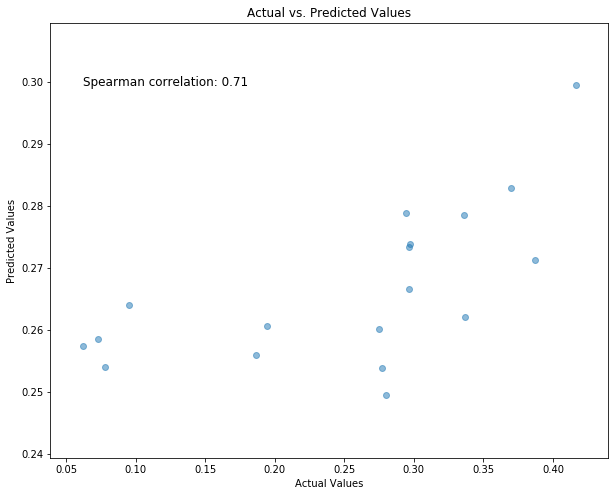

In [19]:
plt.figure(figsize=(10, 8))  # Set the size of the plot
plt.scatter(y, y_pred, alpha=0.5)  # Plot y vs. y_pred

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Optionally, you can annotate the Spearman correlation on the plot
corr, _ = spearmanr(y, y_pred)
plt.text(min(y), max(y_pred), f'Spearman correlation: {corr:.2f}', fontsize=12)


## Step 4: Permutation
**First shuffle Dist_V1V2 against other columns, and then do random forest. Repeat this 1000 times**

In [13]:
# Permutation
from collections import OrderedDict

seed=42
kf = KFold(n_splits=5)
# Max_depth = 10, max_features = "log2", n_estimators=1425, the same setting as the one above
RF_shuffle = RandomForestRegressor(random_state=seed, max_depth=10, n_estimators= 1425, 
                            oob_score=False, max_features = "log2")

permu_times = 1000

#Create an empty array first
#https://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-matrix-in-numpy
permutation_negMSE=a = np.empty(shape=(permu_times,1))

for i in range(1, permu_times + 1):
        #First copy my_data using pandas.DataFrame.copy (the correct way to do this!)
        #https://moonbooks.org/Articles/How-to-copy-a-dataframe-with-pandas-in-python-/
        shuffled_data = my_data.copy()

        #Then shuffle data
        shuffled_data['Dist_V1V2'] = shuffled_data['Dist_V1V2'].sample(frac=1, random_state=i).reset_index(drop=True)
        
        #Then run random forest
        X_shuffle, y_shuffle = shuffled_data.drop(columns=['ID','Dist_V1V2']), shuffled_data.Dist_V1V2
        result_negMSE_shuffle = cross_val_score(RF_shuffle, X_shuffle, y_shuffle, cv = kf, scoring="neg_mean_absolute_error")
        
        # Record the neg MSE for each permutation
        negMSE=result_negMSE_shuffle.mean() #Print average negMSE
        permutation_negMSE[i-1]=negMSE

In [18]:
len(permutation_negMSE)

1000

Text(0.5, 1.0, 'Permutation negative MSE histogram')

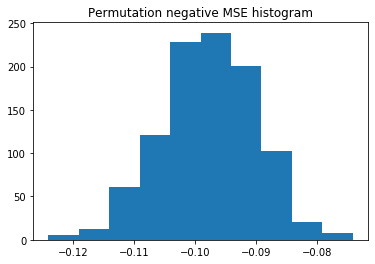

In [19]:
# Plot a histogram
binwidth=0.005
plt.hist(permutation_negMSE, bins=np.arange(min(permutation_negMSE), max(permutation_negMSE) 
                                            + binwidth, binwidth))
plt.title("Permutation negative MSE histogram") 

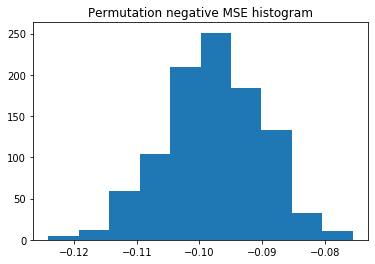

In [20]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMSE)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [21]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMSE, 95)

-0.08575259279559257

## Step 5: Random Forest (using leave-one-out cross-validation)

In [29]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

seed = 42
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2

# Initialize LeaveOneOut object
loo = LeaveOneOut()

# Initialize an array of zeros to hold feature importances
# X.shape[1]: This is the number of columns (features)
# loo.get_n_splits(X): This is the number of splits in LOOCV
individual_feature_importances = np.zeros((X.shape[1], loo.get_n_splits(X)))

# Initialize an empty list to hold the negative MAE scores
neg_mae_scores_loo = []

# Initialize an array to store all LOOCV predictions (for correlation of y and y_pred later)
y_preds_array = np.zeros(len(y))

# Loop over the LOOCV folds
for fold, (train_index, test_index) in enumerate(loo.split(X)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the model with the same hyperparameters
    RF = RandomForestRegressor(random_state=seed, max_depth=10, n_estimators=1425,
                               oob_score=True, max_features="log2")
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = RF.predict(X_test)
    y_preds_array[test_index] = y_pred
    
    # Calculate the MAE for the current fold and append it to the list
    mae = mean_absolute_error(y_test, y_pred)
    neg_mae_scores_loo.append(-mae)  # We negate the MAE to follow your requirement
    
    # Accumulate feature importances for this fold
    individual_feature_importances[:, fold] = RF.feature_importances_

# Calculate median of feature importances
median_importances = np.median(individual_feature_importances, axis=1)

# Sort the mean feature importances in descending order and get the indices
sorted_median_idx = np.argsort(median_importances)[::-1]

# Get the names of the top 10 features based on mean importance
top_10_median_feature_names = X.columns[sorted_median_idx][:10]

# Get the mean importance scores of the top 10 features
top_10_median_importances = median_importances[sorted_median_idx][:10]

# After collecting all predictions, calculate the Spearman correlation
correlation, p_value = spearmanr(y, y_preds_array)

In [30]:
# Print out the negative MAE scores for each fold
#print("Negative MAE scores for each fold: ", neg_mae_scores_loo)

# The average negative MAE score across all folds
print("Average negative MAE: ", np.mean(neg_mae_scores_loo))

Average negative MAE:  -0.08173083779076327


In [31]:
individual_feature_importances.shape

(88, 18)

In [32]:
# Print the top 10 features and their importances
# Use zip because top_10_feature_names and top_10_importances are two iterables that we want to loop over simultaneously.
for name, importance in zip(top_10_median_feature_names, top_10_median_importances):
    print(f"{name}: {importance}")

Shannon: 0.08017391427425105
Bifidobacterium: 0.041960747320676714
Alistipes: 0.03877843416642095
Anaerostipes: 0.03793615139163735
Bacteroides: 0.035046659639948026
Lactobacillus: 0.03030583360076329
Succinivibrio: 0.02724577264731344
Firmicutes.gen..incertae.sedis: 0.02391847484732485
Coprococcus: 0.02381330277670913
Dorea: 0.023534844171224853


In [33]:
#Print the correlation rho and p-value
print(f"Spearman correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman correlation: 0.519
P-value: 0.027


## Step 4: Permutation for LOOCV
**First shuffle Dist_V1V2 against other columns, and then do random forest. Repeat this 1000 times**

In [34]:
# Define the number of permutations
permu_times = 1000

# Create an empty array to store the neg MAE for each permutation
permutation_negMAE_loo = np.empty(permu_times)

# Initialize LOO cross-validation
loo = LeaveOneOut()

# Initialize the random forest with the specified settings
RF_shuffle_loo = RandomForestRegressor(random_state=seed, max_depth=10, n_estimators=1425,
                                       oob_score=False, max_features="log2")

# Run the permutation test with LOO CV
for i in range(permu_times):
    
    # Print the value of i at every 50th iteration so that I know the progress
    # % is modulo calculation
    if i % 50 == 0:
        print(f"Current iteration: {i}")
    
    # Shuffle the 'Dist_V1V2' column
    shuffled_target = my_data['Dist_V1V2'].sample(frac=1, random_state=i).reset_index(drop=True)
    
    # Prepare the data for cross-validation
    X, y_shuffled = my_data.drop(columns=['ID','Dist_V1V2']), shuffled_target
    
    # Variable to accumulate the mean absolute error
    mae_sum = 0
    
    # Perform LOO cross-validation
    for train_index, test_index in loo.split(X):
        # Split the data into train and test for the current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_shuffled.iloc[train_index], y_shuffled.iloc[test_index]
        
        # Fit the model
        RF_shuffle_loo.fit(X_train, y_train)
        
        # Make predictions
        y_pred = RF_shuffle_loo.predict(X_test)
        
        # Calculate the MAE for the current fold and accumulate it
        mae_sum += mean_absolute_error(y_test, y_pred)
    
    # Calculate the average MAE over all folds and store the negative value
    permutation_negMAE_loo[i] = -mae_sum / loo.get_n_splits(X)

Current iteration: 0
Current iteration: 50
Current iteration: 100
Current iteration: 150
Current iteration: 200
Current iteration: 250
Current iteration: 300
Current iteration: 350
Current iteration: 400
Current iteration: 450
Current iteration: 500
Current iteration: 550
Current iteration: 600
Current iteration: 650
Current iteration: 700
Current iteration: 750
Current iteration: 800
Current iteration: 850
Current iteration: 900
Current iteration: 950


In [35]:
len(permutation_negMAE_loo)

1000

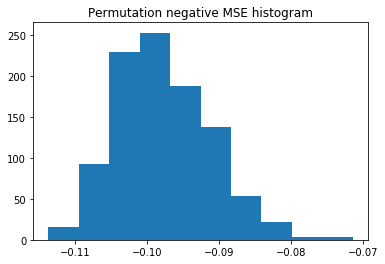

In [36]:
# Calculate area under histogram to get (some sort of) p value
values, bins, _ = plt.hist(permutation_negMAE_loo)
plt.title("Permutation negative MSE histogram") 
area = sum(np.diff(bins)*values)

In [37]:
# What is the p = 0.05 threshold?
np.percentile(permutation_negMAE_loo, 95)

-0.08631766223120445

#### See if the RF (LOOCV) is significant

In [38]:
# Calculate the mean of the negative MAE scores from the actual LOOCV
actual_neg_mae_mean = np.mean(neg_mae_scores_loo)

# Calculate the 95th percentile of the negative MAE scores from the permutation test
percentile_95_loo = np.percentile(permutation_negMAE_loo, 95)

# Compare and print the result
if actual_neg_mae_mean > percentile_95_loo: #sig
    print(f"Actual neg MAE ({actual_neg_mae_mean}) is larger than 95% of the neg MAE from permutation ({percentile_95_loo})")
    print("\033[1mRF is significant\033[0m") #bold text
else: #Nonsig
    print(f"Actual neg MAE ({actual_neg_mae_mean}) is smaller than 95% of the neg MAE from permutation ({percentile_95_loo})")
    print("\033[1mRF is nonsignificant\033[0m") #bold text

Actual neg MAE (-0.08173083779076327) is larger than 95% of the neg MAE from permutation (-0.08631766223120445)
RF is significant


In [39]:
# Calculate the percentage of permutation_negMAE_loo that is less than or equal to actual_neg_mae_mean
percentage_loo = np.mean(permutation_negMAE_loo <= actual_neg_mae_mean) * 100
p_value_loo = round(1 - percentage_loo/100, 3)
print(f"The actual_neg_mae_mean is in the {p_value_loo}% percentile of the permutation distribution, so the p value is {p_value_loo}")


The actual_neg_mae_mean is in the 0.015% percentile of the permutation distribution, so the p value is 0.015
